In [30]:
!pip install pytesseract

In [1]:
import cv2
import pytesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\asannidhi\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [4]:
img = cv2.imread('vitpilen-grey-1.jpg')

In [5]:
# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [7]:
# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

In [8]:
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

In [9]:
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

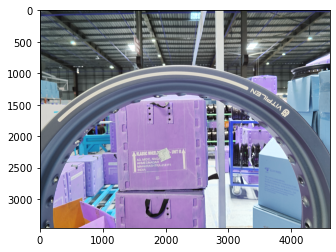

In [11]:
from matplotlib import pyplot as plt
im2 = img.copy()
#im2 = im2[500:2000,300:3500]
plt.imshow(im2)

In [12]:
file = open("recognized.txt", "w+")
file.write("")
file.close()

In [13]:
from matplotlib import pyplot as plt

In [ ]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
    plt.imshow(rect)
     
    # Open the file in append mode
    file = open("recognized.txt", "a")
     
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
     
    # Appending the text into file
    file.write(text)
    file.write("\n")
     
    # Close the file
    file.close

In [ ]:
print(text)